In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
N_DETECTOR = 8
N_BINS = 1024
N_DIGITAL_OUT = 4
CH_SIZE = 4 # 4 - bytes per channel

In [3]:
filename = '../../DT5550_DAQ/daq/ReadoutClient/waveform.raw'

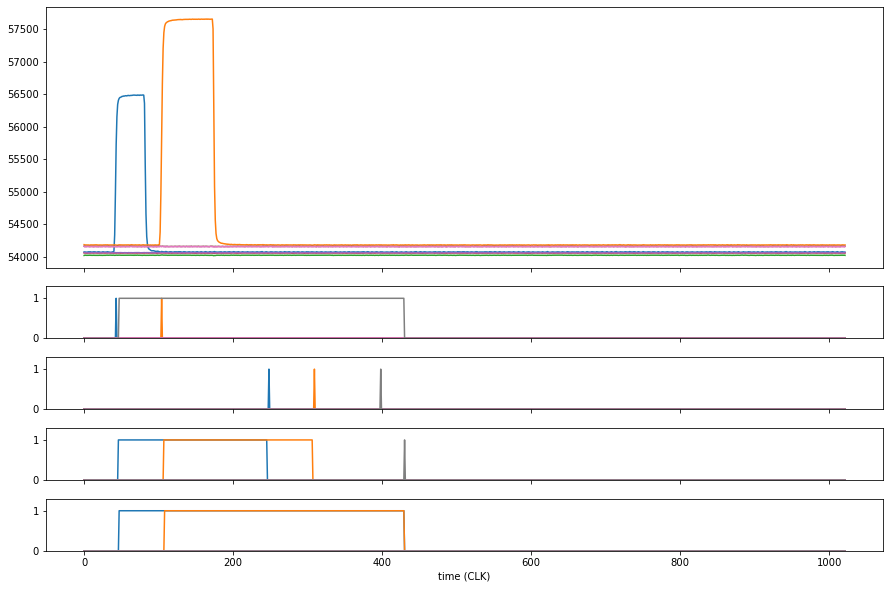

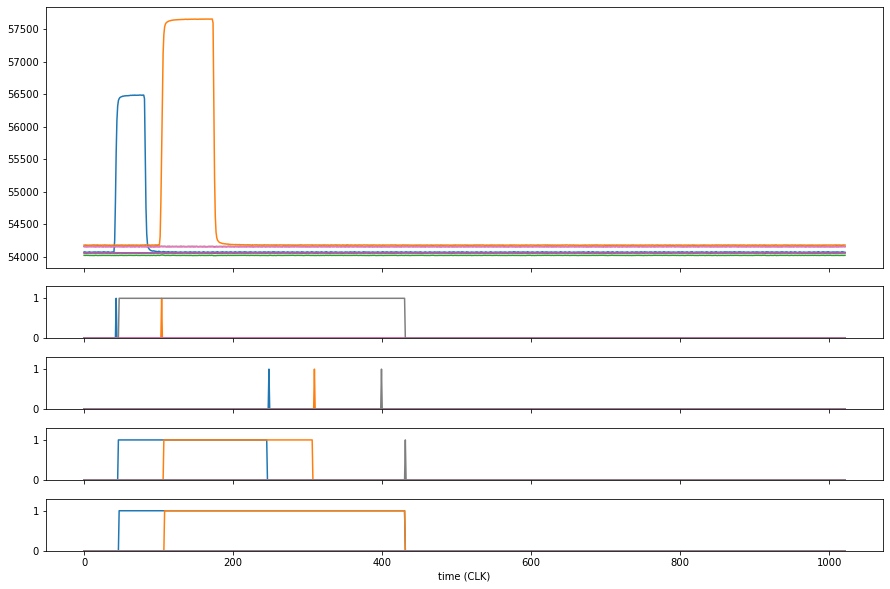

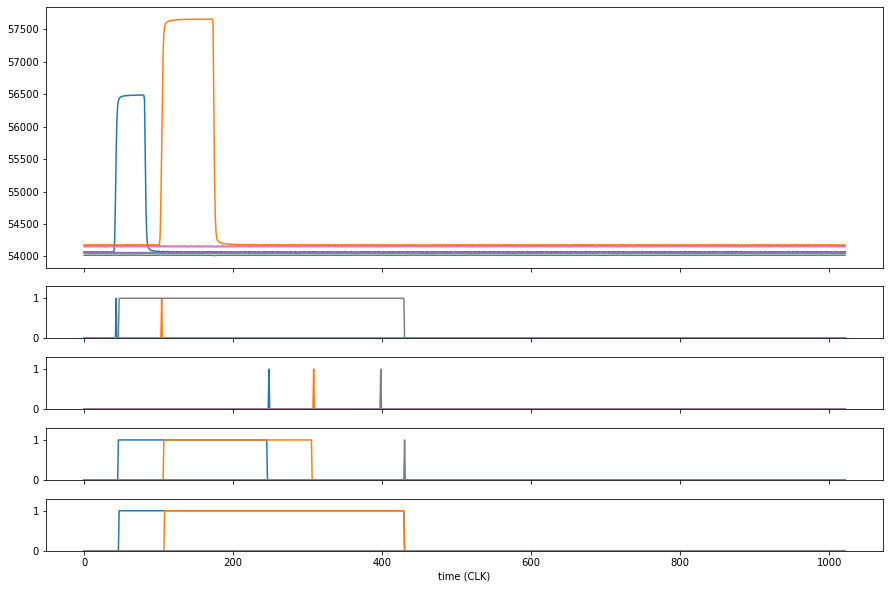

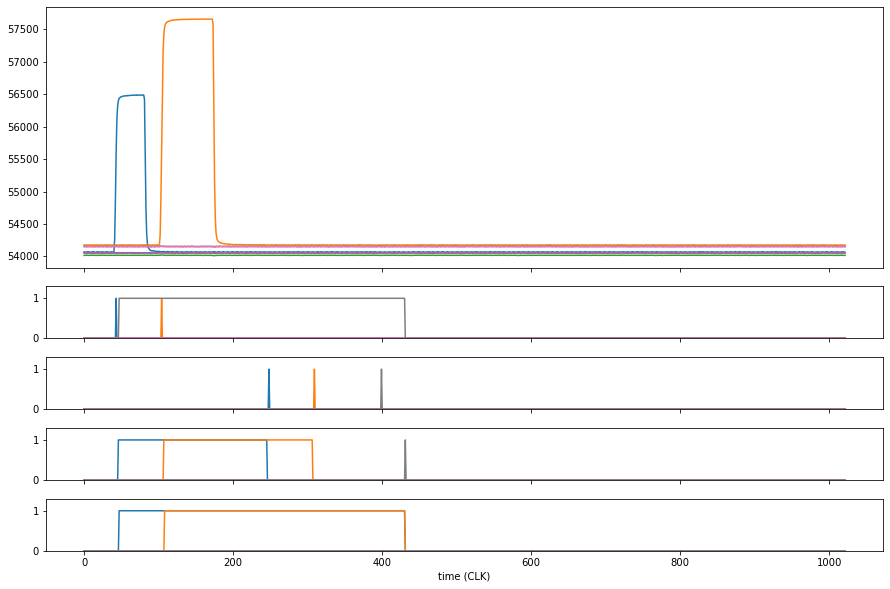

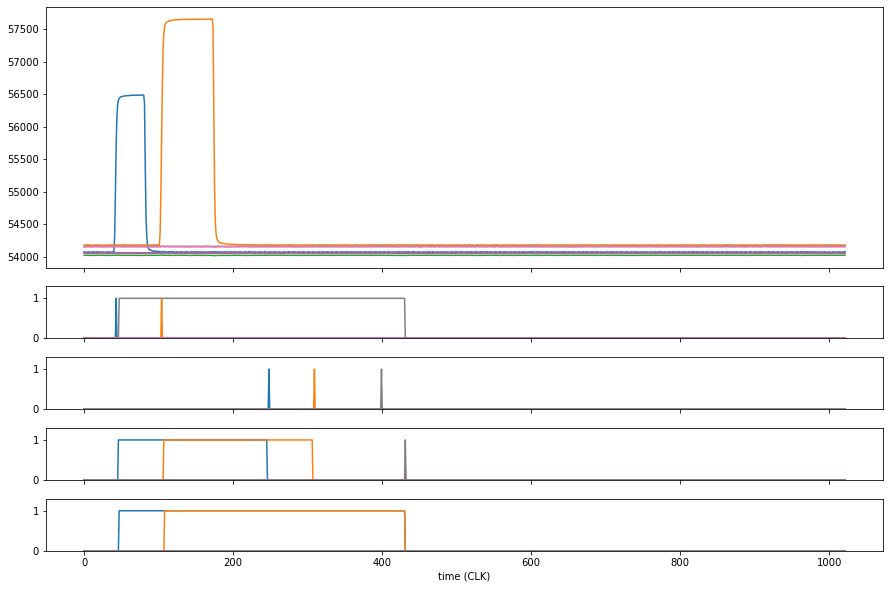

In [17]:
f = open(filename,"rb")
tt = np.zeros(N_BINS)
analog  = np.zeros([N_DETECTOR,N_BINS])
digital = np.zeros([N_DIGITAL_OUT,N_DETECTOR,N_BINS])
d1 = np.zeros([N_DETECTOR,N_BINS])
d2 = np.zeros([N_DETECTOR,N_BINS])
d3 = np.zeros([N_DETECTOR,N_BINS])

for nevent in range(5):
    # process single event
    wave = f.read(N_BINS*N_DETECTOR*CH_SIZE)
    for idet in range(N_DETECTOR):
        for i in range(N_BINS):
            i0 = i*CH_SIZE + idet*N_BINS*CH_SIZE
            i1 = i0+CH_SIZE
            tt[i] = i*12.5
            analog[idet][i] = int.from_bytes(wave[i0:i1],byteorder='little') & 0x0000ffff
            for idig in range(N_DIGITAL_OUT):
                digital[idig][idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') >> 16+idig) & 0x00000001

    # plot single event
    imin=0
    imax=1022
    fig, axs = plt.subplots(5,1, sharex=True, gridspec_kw={'height_ratios':[5,1,1,1,1]}, figsize=(15,10))
    for idet in range(N_DETECTOR-1):
        axs[0].plot(analog[idet][imin:imax])
        for idig in range(N_DIGITAL_OUT):
            axs[1+idig].plot(digital[idig][idet][imin:imax])

    if N_DETECTOR == 8:
        for idig in range(N_DIGITAL_OUT):
            axs[1+idig].plot(digital[idig][7][imin:imax])    
    
    for i in range(1,5):
        axs[i].set_ylim([0,1.3])

    plt.xlabel('time (CLK)')
    plt.show()
    
    time.sleep(1)
f.close()